# Dogbreed Recogntion using AlexNet, GoogleNet, and ResNet

## Introduction

Dog breed recognition is a challenging task in computer vision and machine learning that involves classifying images of dogs into their respective breeds. This task is important in various applications, such as veterinary diagnostics, pet identification, and even in enhancing user experiences in pet-related applications. Accurate breed recognition can aid in better understanding breed-specific traits and health conditions, and can also provide personalized recommendations and services for pet owners.

### Deep Learning Models for Dog Breed Recognition
Deep learning has revolutionized the field of image recognition by providing highly accurate models capable of identifying complex patterns in data. Among the various architectures developed for image classification, AlexNet, GoogleNet, and ResNet-50 stand out due to their innovative approaches and significant performance improvements.

**AlexNet**
AlexNet, developed by Alex Krizhevsky et al. in 2012, was a pioneering deep learning model that won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) that year. The model is known for its simplicity and effectiveness. It introduced the use of deep convolutional neural networks (CNNs) for image classification, which significantly improved performance over traditional methods. Key features include:

* Architecture: Consists of 5 convolutional layers followed by 3 fully connected layers.
* Activation Function: Uses ReLU (Rectified Linear Unit) for non-linearity.
* Pooling: Implements max pooling to reduce dimensionality and computation.
* Dropout: Incorporates dropout to prevent overfitting.

Despite its relatively simpler architecture compared to modern models, AlexNet laid the foundation for many advances in deep learning.

**GoogleNet (Inception V1)**
GoogleNet, introduced by Christian Szegedy et al. in 2014, represents a major advancement in deep convolutional networks. It introduced the Inception module, which allows the network to simultaneously perform convolutions with different kernel sizes and pool operations, capturing various levels of feature representations. Key features include:

* Architecture: Features a deeper architecture with 22 layers and utilizes the Inception module.
* Inception Module: Combines multiple convolutional filters and pooling operations to capture diverse features.
* Auxiliary Classifiers: Includes auxiliary classifiers to improve gradient flow and provide additional supervision during training.
* Efficiency: Uses fewer parameters compared to previous models, making it more computationally efficient.

GoogleNet's architecture provides a balance between depth, computational efficiency, and accuracy.

**ResNet-50**
ResNet (Residual Network), introduced by Kaiming He et al. in 2015, brought a significant breakthrough by using residual connections to allow training of very deep networks. ResNet-50, a variant of the original ResNet, has 50 layers and is known for its exceptional performance on various image classification tasks. Key features include:

* Architecture: Consists of 50 layers with residual blocks that help in mitigating the vanishing gradient problem.
* Residual Connections: Introduces skip connections that bypass one or more layers, enabling the training of deeper networks without performance degradation.
* Batch Normalization: Incorporates batch normalization to stabilize training and improve convergence.

ResNet-50 is widely used due to its ability to achieve high accuracy while remaining computationally efficient.

## Contents

1. [Import libraries and data](#import)

2. [Split the data into training, testing and validation](#splitting)

3. [Build the model](#model-building)

    I)   [AlexNet](#alexnet)
    
    II)  [GoogleNet](#googlenet)
    
    III) [ResNet](#resnet)

4. [Model evaluation](#model-evaluation)


<a id='import'></a>
## Import libraries and data

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Add, GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd

The target size used cannot be smaller than (224,224) as it will affect the calculations in the models.

There are a total of 4934 images. Once appended, the size is (224,224,3). 3 refers to its RGB value.

<a id='splitting'></a>
## Split the data into training, testing and validation

The data is splitted into training, testing and validation set. The ratio of training, testing and validation set is 6:2:2.

After splitting, all of the images in the training, testing and validation sets have to be normalized (divide by 255). Normalization helps to convert an input image to values that are more familiar to the senses.

In [3]:
batch_size = 32
img_height = 224
img_width = 224
data_dir="/kaggle/input/dogbreed/public_dataset/train/images"
test_dir="/kaggle/input/dogbreed/public_dataset/test_public/images"

In [4]:
from tensorflow import keras
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16418 files belonging to 120 classes.
Using 13135 files for training.
Found 16418 files belonging to 120 classes.
Using 3283 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [5]:
class_names = train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [7]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(factor=0.2),
  layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="wrap")
])

In [8]:
train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.00013211434 0.98460937


<a id='model-building'></a>

## Build the model

<a id='googlenet'></a>
### GoogleNet

In [12]:
# create model
def inception(x, filters):
    # 1x1
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)

    # 1x1->3x3
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path2)
    
    # 1x1->5x5
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path3)

    # 3x3->1x1
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])


def auxiliary(x, name=None):
    layer = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
    layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=256, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(units=CLASS_NUM, activation='softmax', name=name)(layer)
    return layer


def googlenet():
    layer_in = Input(shape=IMAGE_SHAPE)
    
    # stage-1
    layer = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(layer_in)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    # stage-3
    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary(layer, name='aux1')
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary(layer, name='aux2')
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-5
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    layer = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(layer)
    
    # stage-6
    layer = Flatten()(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(units=256, activation='linear',kernel_regularizer=regularizers.l2(0.0001))(layer)
    main = Dense(units=CLASS_NUM, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])
    
    return model

In [13]:
CLASS_NUM = 120
BATCH_SIZE = 32
# EPOCH_STEPS = int(X_train.shape[0]/BATCH_SIZE)
IMAGE_SHAPE = (224, 224, 3)
MODEL_NAME = 'googlenet_dogbreed.h5'

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 56, 56, 64)   256         max_pooling2d[0][0]              
_______________________________________________________________________________________

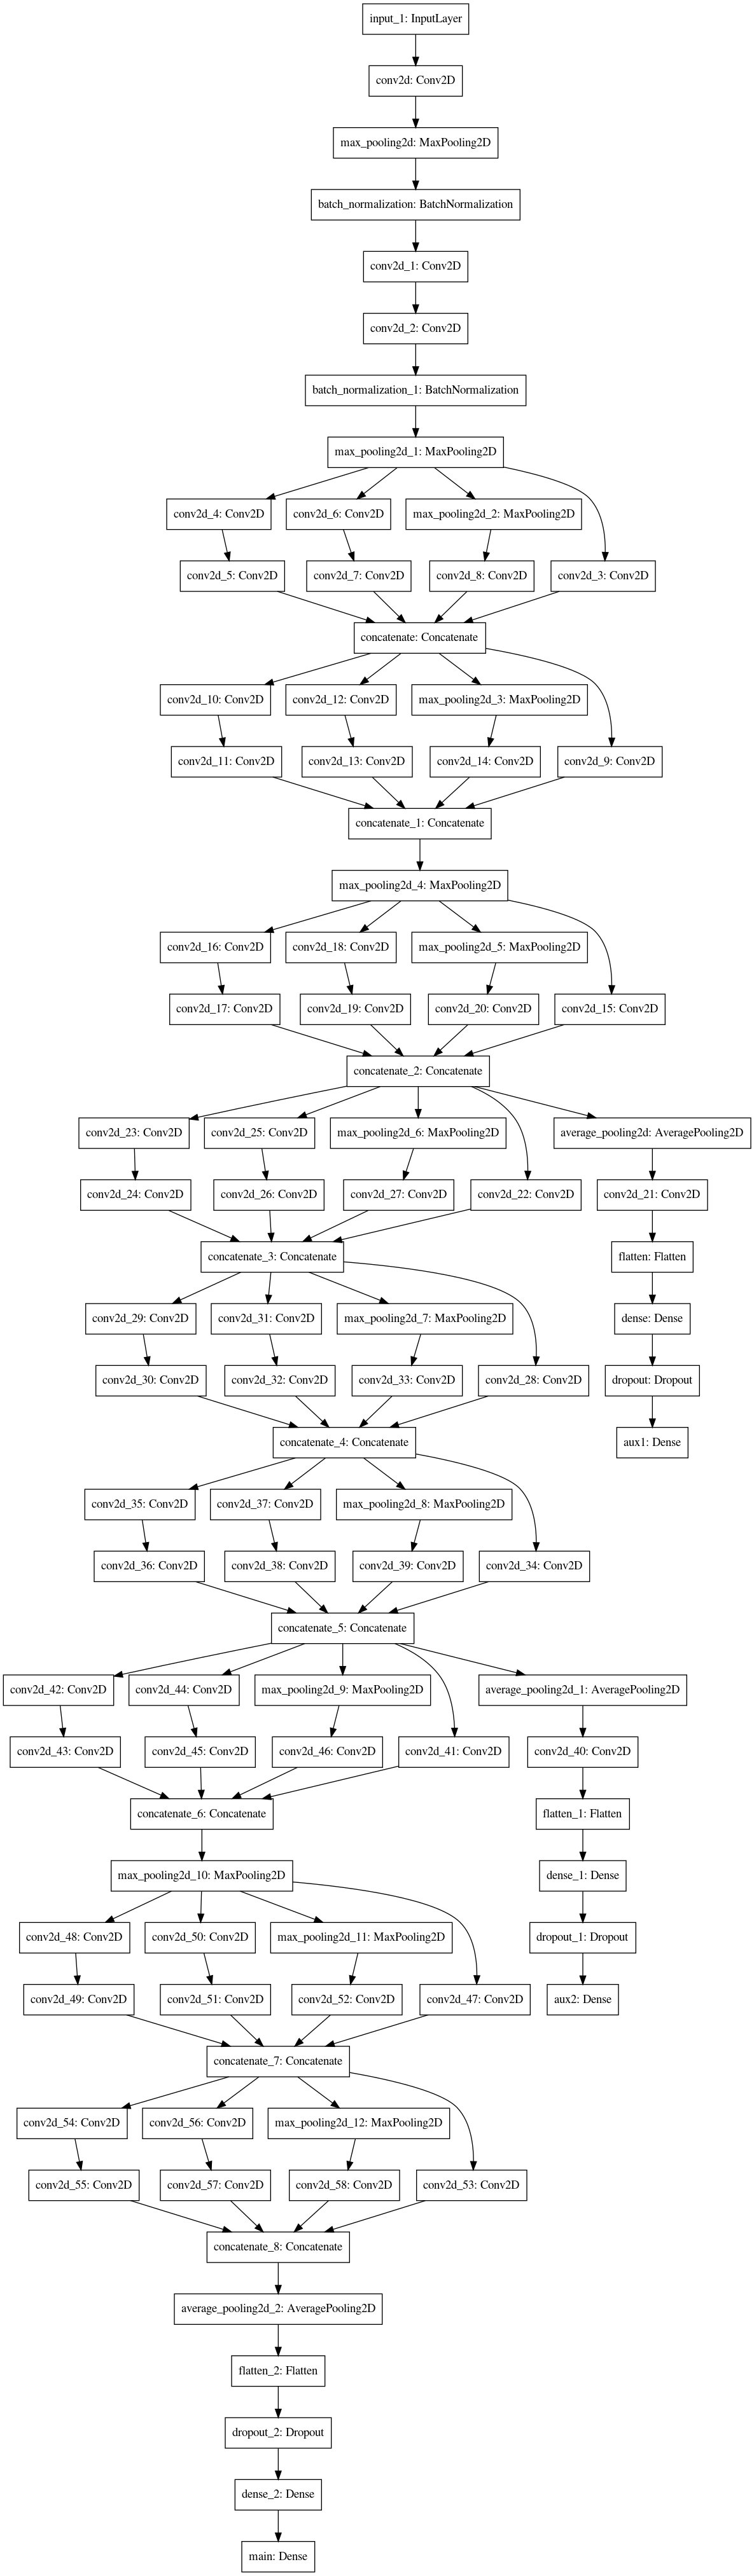

In [14]:
model = googlenet()
model.summary()
#model.load_weights(MODEL_NAME)
tf.keras.utils.plot_model(model, 'GoogLeNet.png')

In [15]:
# train model


optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#optimizer = SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
optimizer = ['Adam', 'SGD', 'Adam', 'SGD']
epochs = [6, 9, 6, 9]
history_all = {}

# history = model.fit(X_train,y_train,epochs=20,steps_per_epoch=EPOCH_STEPS,validation_data=(X_valid,y_valid))
history = model.fit(train_ds,epochs=100,validation_data=val_ds,callbacks=[early_stop]
                    )
model.save(MODEL_NAME)

Epoch 1/100
411/411 [==============================] - 47s 115ms/step - loss: 14.4812 - main_loss: 4.7840 - aux1_loss: 4.7955 - aux2_loss: 4.7873 - main_accuracy: 0.0107 - aux1_accuracy: 0.0105 - aux2_accuracy: 0.0096 - val_loss: 14.3211 - val_main_loss: 4.7255 - val_aux1_loss: 4.7438 - val_aux2_loss: 4.7455 - val_main_accuracy: 0.0180 - val_aux1_accuracy: 0.0183 - val_aux2_accuracy: 0.0171
Epoch 2/100
411/411 [==============================] - 33s 81ms/step - loss: 14.2365 - main_loss: 4.6940 - aux1_loss: 4.7143 - aux2_loss: 4.7252 - main_accuracy: 0.0174 - aux1_accuracy: 0.0212 - aux2_accuracy: 0.0152 - val_loss: 14.2635 - val_main_loss: 4.7247 - val_aux1_loss: 4.7130 - val_aux2_loss: 4.7255 - val_main_accuracy: 0.0113 - val_aux1_accuracy: 0.0222 - val_aux2_accuracy: 0.0186
Epoch 3/100
411/411 [==============================] - 33s 81ms/step - loss: 13.9149 - main_loss: 4.5759 - aux1_loss: 4.6089 - aux2_loss: 4.6320 - main_accuracy: 0.0220 - aux1_accuracy: 0.0279 - aux2_accuracy: 0.0

<a id='alexnet'></a>
### AlexNet

In [16]:
def alexnet():
    model = Sequential()
    
    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=IMAGE_SHAPE, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    
    # Flatten
    model.add(Flatten())
    
    # Fully Connected Layers
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=CLASS_NUM, activation='softmax'))
    
    return model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 12, 12, 256)      

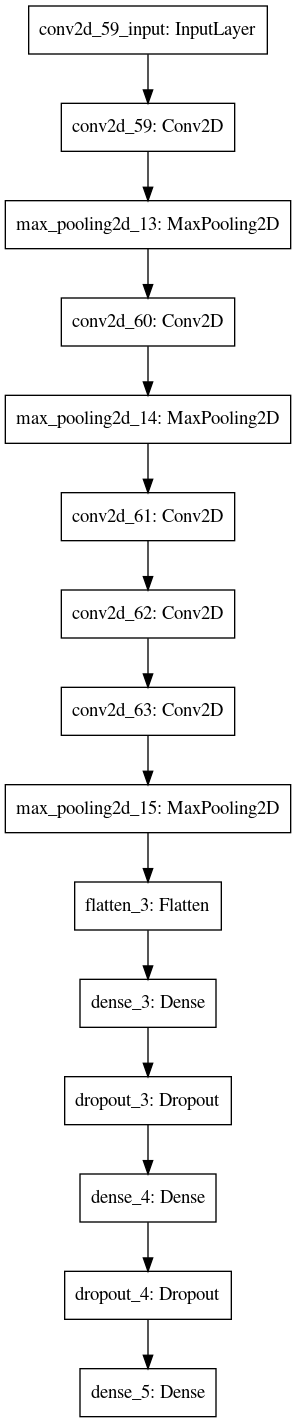

In [17]:
# AlexNet Model
model_alexnet = alexnet()
model_alexnet.summary()
tf.keras.utils.plot_model(model_alexnet, 'AlexNet.png')

In [18]:
# Compile the model
optimizer_alexnet = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_alexnet.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_alexnet, metrics=['accuracy'])

# Set up early stopping
early_stop_alexnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history_alexnet = model_alexnet.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stop_alexnet]
)

# Save the model
MODEL_NAME_ALEXNET = 'alexnet_dogbreed.h5'
model_alexnet.save(MODEL_NAME_ALEXNET)

Epoch 1/30
411/411 [==============================] - 11s 26ms/step - loss: 4.9649 - accuracy: 0.0097 - val_loss: 4.7819 - val_accuracy: 0.0104
Epoch 2/30
411/411 [==============================] - 10s 25ms/step - loss: 4.7846 - accuracy: 0.0113 - val_loss: 4.7834 - val_accuracy: 0.0134
Epoch 3/30
411/411 [==============================] - 11s 26ms/step - loss: 4.7680 - accuracy: 0.0142 - val_loss: 4.7197 - val_accuracy: 0.0155
Epoch 4/30
411/411 [==============================] - 10s 25ms/step - loss: 4.7124 - accuracy: 0.0155 - val_loss: 4.6218 - val_accuracy: 0.0253
Epoch 5/30
411/411 [==============================] - 10s 25ms/step - loss: 4.6594 - accuracy: 0.0178 - val_loss: 4.5778 - val_accuracy: 0.0231
Epoch 6/30
411/411 [==============================] - 10s 25ms/step - loss: 4.5969 - accuracy: 0.0254 - val_loss: 4.5324 - val_accuracy: 0.0265
Epoch 7/30
411/411 [==============================] - 10s 25ms/step - loss: 4.5188 - accuracy: 0.0316 - val_loss: 4.4217 - val_accuracy:

<a id='resnet'></a>
### ResNet-50

In [19]:
def identity_block(x, filters, kernel_size):
    # Main path
    x_shortcut = x
    
    # First component of main path
    x = Conv2D(filters=filters[0], kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second component of main path
    x = Conv2D(filters=filters[1], kernel_size=(kernel_size, kernel_size), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Third component of main path
    x = Conv2D(filters=filters[2], kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    
    # Add shortcut value to main path
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)
    
    return x

def convolutional_block(x, filters, kernel_size, strides):
    # Main path
    x_shortcut = x
    
    # First component of main path
    x = Conv2D(filters=filters[0], kernel_size=(1, 1), strides=strides, padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second component of main path
    x = Conv2D(filters=filters[1], kernel_size=(kernel_size, kernel_size), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Third component of main path
    x = Conv2D(filters=filters[2], kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    
    # Shortcut path
    x_shortcut = Conv2D(filters=filters[2], kernel_size=(1, 1), strides=strides, padding='valid')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)
    
    # Add shortcut value to main path
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)
    
    return x

def resnet50():
    input_shape = IMAGE_SHAPE
    layer_in = Input(shape=input_shape)
    
    # Stage 1
    x = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding='same')(layer_in)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    # Stage 2
    x = convolutional_block(x, filters=[64, 64, 256], kernel_size=3, strides=(1, 1))
    x = identity_block(x, filters=[64, 64, 256], kernel_size=3)
    x = identity_block(x, filters=[64, 64, 256], kernel_size=3)
    
    # Stage 3
    x = convolutional_block(x, filters=[128, 128, 512], kernel_size=3, strides=(2, 2))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=3)
    x = identity_block(x, filters=[128, 128, 512], kernel_size=3)
    x = identity_block(x, filters=[128, 128, 512], kernel_size=3)
    
    # Stage 4
    x = convolutional_block(x, filters=[256, 256, 1024], kernel_size=3, strides=(2, 2))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=3)
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=3)
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=3)
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=3)
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=3)
    
    # Stage 5
    x = convolutional_block(x, filters=[512, 512, 2048], kernel_size=3, strides=(2, 2))
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=3)
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=3)
    
    # AVGPOOL
    x = GlobalAveragePooling2D()(x)
    
    # Output layer
    output = Dense(CLASS_NUM, activation='softmax')(x)
    
    model = Model(inputs=layer_in, outputs=output)
    
    return model

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 112, 112, 64) 256         conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           batch_normalization_2[0][0]      
_______________________________________________________________________________________

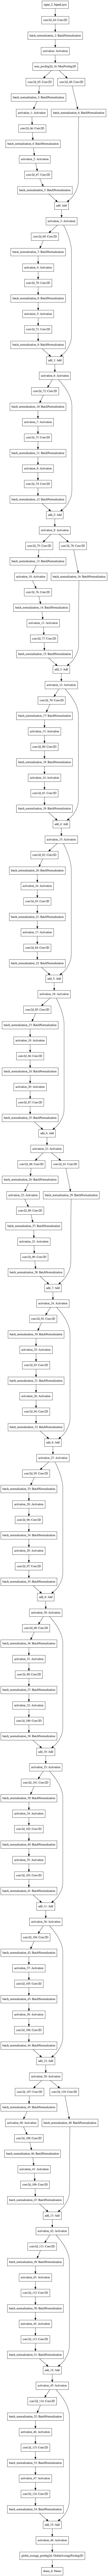

In [20]:
# ResNet-50 Model
model_resnet = resnet50()
model_resnet.summary()
tf.keras.utils.plot_model(model_resnet, 'ResNet50.png')

In [24]:
# Compile the model
optimizer_resnet = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_resnet.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_resnet, metrics=['accuracy'])

# Set up early stopping
early_stop_resnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history_resnet = model_resnet.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stop_resnet]
)

# Save the model
MODEL_NAME_RESNET = 'resnet50_dogbreed.h5'
model_resnet.save(MODEL_NAME_RESNET)

Epoch 1/30
411/411 [==============================] - 74s 181ms/step - loss: 4.9019 - accuracy: 0.0155 - val_loss: 5.0764 - val_accuracy: 0.0149
Epoch 2/30
411/411 [==============================] - 73s 177ms/step - loss: 4.6621 - accuracy: 0.0278 - val_loss: 4.8534 - val_accuracy: 0.0262
Epoch 3/30
411/411 [==============================] - 73s 177ms/step - loss: 4.5240 - accuracy: 0.0380 - val_loss: 4.8993 - val_accuracy: 0.0231
Epoch 4/30
411/411 [==============================] - 73s 178ms/step - loss: 4.3496 - accuracy: 0.0593 - val_loss: 4.7731 - val_accuracy: 0.0378
Epoch 5/30
411/411 [==============================] - 73s 177ms/step - loss: 4.1379 - accuracy: 0.0789 - val_loss: 4.8451 - val_accuracy: 0.0329
Epoch 6/30
411/411 [==============================] - 73s 177ms/step - loss: 3.8676 - accuracy: 0.1189 - val_loss: 4.8442 - val_accuracy: 0.0414
Epoch 7/30
411/411 [==============================] - 73s 177ms/step - loss: 3.5479 - accuracy: 0.1646 - val_loss: 4.7800 - val_ac

<a id='model-evaluation'></a>
## Model Evaluation

In [25]:
# Evaluate GoogleNet
googlenet_score = model.evaluate(val_ds)
print(f"GoogleNet Test Loss: {googlenet_score[0]}")
print(f"GoogleNet Test Accuracy: {googlenet_score[1]}")

# Evaluate AlexNet
alexnet_score = model_alexnet.evaluate(val_ds)
print(f"AlexNet Test Loss: {alexnet_score[0]}")
print(f"AlexNet Test Accuracy: {alexnet_score[1]}")

# Evaluate ResNet-50
resnet_score = model_resnet.evaluate(val_ds)
print(f"ResNet-50 Test Loss: {resnet_score[0]}")
print(f"ResNet-50 Test Accuracy: {resnet_score[1]}")

103/103 [==============================] - 3s 29ms/step - loss: 12.5745 - main_loss: 4.4778 - aux1_loss: 3.8437 - aux2_loss: 4.1506 - main_accuracy: 0.1642 - aux1_accuracy: 0.1581 - aux2_accuracy: 0.1581
GoogleNet Test Loss: 12.574483871459961
GoogleNet Test Accuracy: 4.477771282196045
103/103 [==============================] - 1s 11ms/step - loss: 8.7639 - accuracy: 0.0713
AlexNet Test Loss: 8.763946533203125
AlexNet Test Accuracy: 0.07127626985311508
103/103 [==============================] - 5s 53ms/step - loss: 5.7829 - accuracy: 0.0825
ResNet-50 Test Loss: 5.782895088195801
ResNet-50 Test Accuracy: 0.08254645019769669


In [26]:
model_scores = {
    "GoogleNet": {"Loss": googlenet_score[0], "Accuracy": googlenet_score[1]},
    "AlexNet": {"Loss": alexnet_score[0], "Accuracy": alexnet_score[1]},
    "ResNet-50": {"Loss": resnet_score[0], "Accuracy": resnet_score[1]},
}

print(model_scores)

{'GoogleNet': {'Loss': 12.574483871459961, 'Accuracy': 4.477771282196045}, 'AlexNet': {'Loss': 8.763946533203125, 'Accuracy': 0.07127626985311508}, 'ResNet-50': {'Loss': 5.782895088195801, 'Accuracy': 0.08254645019769669}}


In [27]:
print("Model Performance Comparison:")
for model_name, scores in model_scores.items():
    print(f"{model_name} - Loss: {scores['Loss']:.4f}, Accuracy: {scores['Accuracy']:.4f}")

Model Performance Comparison:
GoogleNet - Loss: 12.5745, Accuracy: 4.4778
AlexNet - Loss: 8.7639, Accuracy: 0.0713
ResNet-50 - Loss: 5.7829, Accuracy: 0.0825


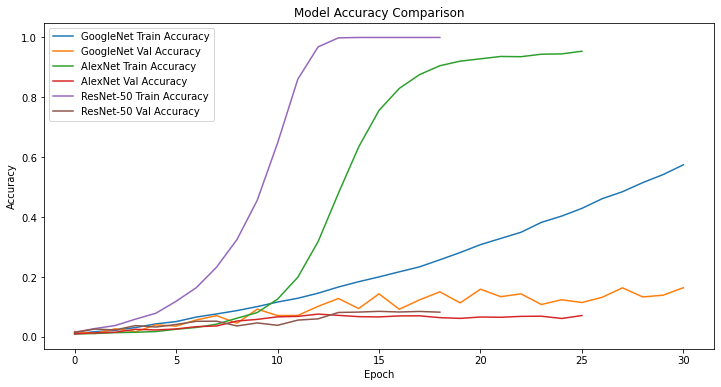

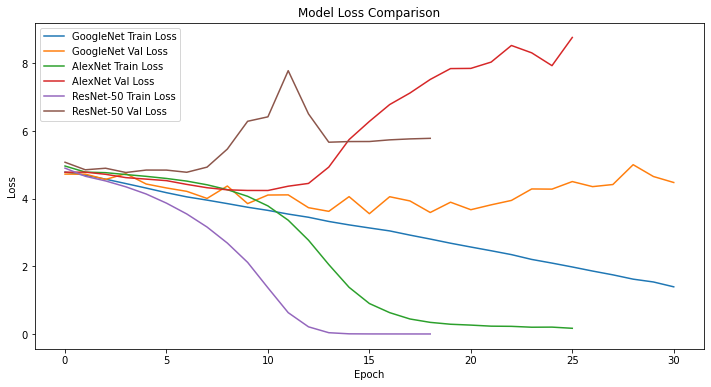

In [37]:
# Combined Accuracy Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['main_accuracy'], label='GoogleNet Train Accuracy')
plt.plot(history.history['val_main_accuracy'], label='GoogleNet Val Accuracy')
plt.plot(history_alexnet.history['accuracy'], label='AlexNet Train Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='AlexNet Val Accuracy')
plt.plot(history_resnet.history['accuracy'], label='ResNet-50 Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet-50 Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Combined Loss Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['main_loss'], label='GoogleNet Train Loss')
plt.plot(history.history['val_main_loss'], label='GoogleNet Val Loss')
plt.plot(history_alexnet.history['loss'], label='AlexNet Train Loss')
plt.plot(history_alexnet.history['val_loss'], label='AlexNet Val Loss')
plt.plot(history_resnet.history['loss'], label='ResNet-50 Train Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet-50 Val Loss')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


**Model Accuracy Comparison:**

* ResNet-50 shows the fastest increase in training accuracy but poor validation accuracy, suggesting overfitting.
* AlexNet also seems to overfit as it reaches high training accuracy quickly while validation accuracy is low.
* GoogleNet shows a slower but more consistent increase in training accuracy and slightly better validation accuracy than the other two models, indicating better generalization.

**Model Loss Comparison:**
* GoogleNet shows a steady decrease in training loss and relatively stable validation loss, indicating it may be learning well with some generalization issues.
* AlexNet and ResNet-50 show classic signs of overfitting with training loss decreasing rapidly to near zero while validation loss increases, indicating that they may not generalize well to new data.

### Result:
* Overfitting: Both AlexNet and ResNet-50 models are likely overfitting, as shown by the high training accuracy and low validation accuracy with low training loss but high validation loss.
* Generalization: GoogleNet appears to generalize slightly better than the other models, though there is still a significant gap between training and validation performance.

## Conclusion

The analysis indicates that both AlexNet and ResNet-50 models show signs of overfitting, with high training accuracy but lower validation accuracy, suggesting they may not generalize well to unseen data. GoogleNet, while also facing some challenges, demonstrates better generalization capabilities compared to AlexNet and ResNet-50. This suggests that GoogleNet might be a more effective choice for dog breed recognition tasks, but further improvements are needed to enhance its validation performance and overall robustness.

---